In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install xlrd

In [0]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [0]:
#https://drive.google.com/open?id=11ds5_FV2n6SxXtstFS6e39KLaoaSPL7v
train_download=drive.CreateFile({'id':'11ds5_FV2n6SxXtstFS6e39KLaoaSPL7v'})
train_download.GetContentFile('AirQualityUCI.xlsx')
#pd.read_excel(open('AirQualityUCI','rb'))
#df_train.head()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split

In [78]:
df_train = pd.read_excel('AirQualityUCI.xlsx')
df_train.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239


In [79]:
df_train.shape

(9357, 15)

In [0]:
#cheking for null values
df_train.isnull().sum()
df_train = df_train.drop('Date', axis=1)
df_train = df_train.drop('Time', axis=1)
#ccc

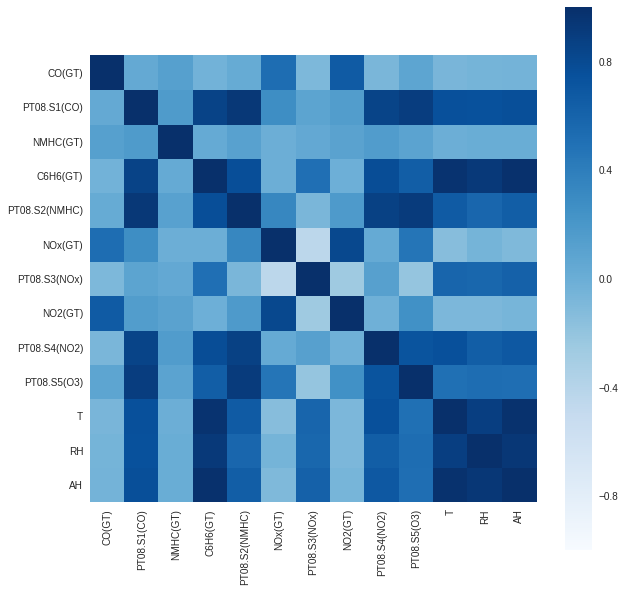

In [81]:
correlation=df_train.corr()
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,cmap='Blues')

In [82]:
correlation

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


In [0]:
 df_train=df_train.drop('RH', axis=1)

In [84]:
correlation

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


In [0]:
Y_train = df_train['C6H6(GT)'].values
df_train = df_train.drop('C6H6(GT)', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train, Y_train, test_size=0.3)



In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print("Predicted values:", regressor.predict(X_test))
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

Predicted values: [ 6.75500529 18.37470074  9.6549235  ...  6.89238323  6.69994801
  3.56572479]
R^2 score for liner regression:  0.9992692761545954


In [89]:
from sklearn.svm import SVR
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:
print("R square value is {}".format(support_regressor.score(X_train, y_train)))

R square value is 0.9999937512474643
